In [1]:
using JSON
using Colors: RGB, HSV, colormap
using CairoMakie

include("../Modules/TestingFunctions.jl")
using .TestingFunctions

# Overall Performance Results

In [2]:
test_search = Dict(
    "prediction_type" => "single_step",
    "testing_params" => Dict(
        "dont_mask_input_vector" => false, # slightly better for lower time steps, no effect for most SS: slightly better all round
        "mask_states_b4_readout" => false, # much worse, worse than random choice on attractor. SS: no effect
        "stochastic" => false,
        "stochastic_rescale_V_rec" => false,
        "partition_choose_at_random" => false, # much worse, worse than vanilla SS: same
        "partition_take_turns" => false, # this doesn't work properly SS: worse, only as good as vanilla
        "readout_switching" => false,
        "layer_connections_one_to_one_constant_value" => false, # no effect (like none) SS: same
        "layer_connections_one_to_one_randomised" => false, # no significant effect, SS: slightly better, but not significant (~1σ)
        "layer_connections_fully_connected_trans_probs" => false, # slightly worse, ~3σ SS: worse, worse than Vanilla
        "layer_connections_fully_connected_constant_value" => false, # slightly worse, ~3σ
        "layer_connections_sparsely_connected" => false, # slightly worse, ~2σ
        "layer_connections_disconnected" => false, # no effect
        "add_self_loops" => false # no effect
    ),
    "data" => "Lorenz 0_01",# Extra Long",
    "testing_parameter" => "n_steps",
    "ignore_first" => 100,
    "trials" => 30,
    "total_k" => 468,
    "noise_std" => 0.1
)

test_dict = Dict()

test_search["m"] = 1
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict["Traditional ESN"] = tests[1]

1 tests found


Dict{String, Any} with 17 entries:
  "prediction_type"   => "single_step"
  "testing_params"    => Dict{String, Any}("mask_states_b4_readout"=>false, "la…
  "data"              => "Lorenz 0_01"
  "num_partitions"    => 1
  "error_funcs"       => Any["RMSE", "turning_partition_RMSE"]
  "noise_std"         => 0.1
  "testing_parameter" => "n_steps"
  "measurements"      => Dict{String, Any}("RMSE"=>Dict{String, Any}("minimum"=…
  "k"                 => 468
  "date"              => "2025-04-04"
  "ignore_first"      => 100
  "trials"            => 30
  "τ"                 => 1
  "m"                 => 1
  "total_k"           => 468
  "aggregation_funcs" => Any["mean", "std", "minimum", "maximum", "median"]
  "n_steps"           => Any[1, 2, 3, 5, 10, 20, 30, 40, 50, 70, 100]

In [3]:
# test_search["m"] = 2
# # test_search["testing_params"]["readout_switching"] = true
# tests = find_test(test_search)
# println(length(tests), " tests found")
# test_dict["OPESN, m=2"] = tests[end]

# test_search["m"] = 3
# # test_search["testing_params"]["readout_switching"] = true
# tests = find_test(test_search)
# println(length(tests), " tests found")
# test_dict["OPESN, m=3"] = tests[end-1]

# test_search["m"] = 4
# # test_search["testing_params"]["readout_switching"] = true
# delete!(test_search, "total_k")
# tests = find_test(test_search)
# println(length(tests), " tests found")
# test_dict["OPESN, m=4"] = tests[end]

# fig = chart_tests(
#     "OPESN Direct Prediction",
#     "Number of prediction steps",
#     "RMSE",
#     test_dict,
#     error_funcs=["RMSE"],
#     aggregation_funcs=["range", "mean", "std"],
#     ylim_low=0,
#     ylim_high=14,
#     use_m_for_colour=false,
#     put_first="Traditional ESN"
# )

# save("OPESN_direct_tau=20_noise=0.1_k=468.pdf", fig)

# display(fig)

# Input Routing & Gating

In [4]:
# architecture = "ORSESN"

# test_search = Dict(
#     "prediction_type" => "single_step",
#     "testing_params" => Dict(
#         "dont_mask_input_vector" => false, # slightly better for lower time steps, no effect for most SS: slightly better all round
#         "mask_states_b4_readout" => false, # much worse, worse than random choice on attractor. SS: no effect
#         "stochastic" => false,
#         "stochastic_rescale_V_rec" => false,
#         "partition_choose_at_random" => false, # much worse, worse than vanilla SS: same
#         "partition_take_turns" => false, # this doesn't work properly SS: worse, only as good as vanilla
#         "readout_switching" => true,
#         "layer_connections_one_to_one_constant_value" => false, # no effect (like none) SS: same
#         "layer_connections_one_to_one_randomised" => false, # no significant effect, SS: slightly better, but not significant (~1σ)
#         "layer_connections_fully_connected_trans_probs" => false, # slightly worse, ~3σ SS: worse, worse than Vanilla
#         "layer_connections_fully_connected_constant_value" => false, # slightly worse, ~3σ
#         "layer_connections_sparsely_connected" => false, # slightly worse, ~2σ
#         "layer_connections_disconnected" => false, # no effect
#         "add_self_loops" => false # no effect
#     ),
#     "data" => "Lorenz 0_01",# Extra Long",
#     "testing_parameter" => "n_steps",
#     "ignore_first" => 100,
#     # "trials" => 30,
#     "total_k" => 468,
#     "noise_std" => 0.1
# )

# test_dict = Dict()

# test_search["m"] = 1
# tests = find_test(test_search)
# println(length(tests), " tests found")
# test_dict["Traditional ESN"] = tests[1]

# test_search["m"] = 2
# test_search["τ"] = 20

# tests = find_test(test_search)
# println(length(tests), " tests found")
# test_dict[architecture * " with partition driven input routing"] = tests[end]

# test_search["testing_params"]["partition_choose_at_random"] = true
# tests = find_test(test_search)
# println(length(tests), " tests found")
# test_dict[architecture * " with random input routing"] = tests[end]
# test_search["testing_params"]["partition_choose_at_random"] = false

# fig = chart_tests(
#     "",#m = " * string(test_search["m"]),
#     # "ORSESN Readout Gating - Ordinal Partition Driven vs. Random Selection",#\nm = 2",
#     "",
#     # "Number of prediction steps",
#     "RMSE",
#     test_dict,
#     error_funcs=["RMSE"],
#     aggregation_funcs=["range", "mean", "std"],
#     ylim_low=0,
#     ylim_high=10,
#     use_m_for_colour=false,
#     put_first="Traditional ESN",
#     height=200,#85,
#     legend_proportion=0,
#     # legend_proportion=0.3,
#     include_legend=false
# )

# save(architecture * "_routing_direct_ordinal_vs_random_m=" * string(test_search["m"]) * ".pdf", fig)

# display(fig)

# Sub-Reservoir Connections

In [5]:
# test_search = Dict(
#     "prediction_type" => "single_step",
#     "testing_params" => Dict(
#         "dont_mask_input_vector" => false, # slightly better for lower time steps, no effect for most SS: slightly better all round
#         "mask_states_b4_readout" => false, # much worse, worse than random choice on attractor. SS: no effect
#         "stochastic" => false,
#         "stochastic_rescale_V_rec" => false,
#         "partition_choose_at_random" => false, # much worse, worse than vanilla SS: same
#         "partition_take_turns" => false, # this doesn't work properly SS: worse, only as good as vanilla
#         "readout_switching" => false,
#         "layer_connections_one_to_one_constant_value" => false, # no effect (like none) SS: same
#         "layer_connections_one_to_one_randomised" => false, # no significant effect, SS: slightly better, but not significant (~1σ)
#         "layer_connections_fully_connected_trans_probs" => false, # slightly worse, ~3σ SS: worse, worse than Vanilla
#         "layer_connections_fully_connected_constant_value" => false, # slightly worse, ~3σ
#         "layer_connections_sparsely_connected" => false, # slightly worse, ~2σ
#         "layer_connections_disconnected" => false, # no effect
#         "add_self_loops" => false # no effect
#     ),
#     "data" => "Lorenz 0_01",# Extra Long",
#     "testing_parameter" => "n_steps",
#     "ignore_first" => 100,
#     # "trials" => 30,
#     "total_k" => 468,
#     "noise_std" => 0.1
# )

# test_dict = Dict()

# test_search["m"] = 1
# tests = find_test(test_search)
# println(length(tests), " tests found")
# test_dict["Traditional ESN"] = tests[1]

# test_search["m"] = 2
# test_search["τ"] = 20

# tests = find_test(test_search)
# println(length(tests), " tests found")
# test_dict["One-to-one connections scaled according to ordinal transition probabilities"] = tests[end]

# test_search["testing_params"]["layer_connections_one_to_one_constant_value"] = true
# tests = find_test(test_search)
# println(length(tests), " tests found")
# test_dict["One-to-one connections with constant value connections"] = tests[end]
# test_search["testing_params"]["layer_connections_one_to_one_constant_value"] = false

# test_search["testing_params"]["layer_connections_one_to_one_randomised"] = true
# tests = find_test(test_search)
# println(length(tests), " tests found")
# test_dict["One-to-one connections with random normal connections"] = tests[end]
# test_search["testing_params"]["layer_connections_one_to_one_randomised"] = false

# test_search["testing_params"]["layer_connections_fully_connected_trans_probs"] = true
# tests = find_test(test_search)
# println(length(tests), " tests found")
# test_dict["Fully connected sub-reservoirs scaled according to ordinal transition probabilities"] = tests[end]
# test_search["testing_params"]["layer_connections_fully_connected_trans_probs"] = false

# test_search["testing_params"]["layer_connections_fully_connected_constant_value"] = true
# tests = find_test(test_search)
# println(length(tests), " tests found")
# test_dict["Fully connected sub-reservoirs with constant value connections"] = tests[end]
# test_search["testing_params"]["layer_connections_fully_connected_constant_value"] = false

# test_search["testing_params"]["layer_connections_sparsely_connected"] = true
# tests = find_test(test_search)
# println(length(tests), " tests found")
# test_dict["Sparsely connected sub-reservoirs"] = tests[end]
# test_search["testing_params"]["layer_connections_sparsely_connected"] = false

# test_search["testing_params"]["layer_connections_disconnected"] = true
# tests = find_test(test_search)
# println(length(tests), " tests found")
# test_dict["Disconnected sub-reservoirs"] = tests[end]
# test_search["testing_params"]["layer_connections_disconnected"] = false

# test_search["testing_params"]["stochastic"] = true
# tests = find_test(test_search)
# println(length(tests), " tests found")
# test_dict["One-to-one connections with stochastically activated constant value connections"] = tests[end]
# test_search["testing_params"]["stochastic"] = false

# fig = chart_tests(
#     # "Lorenz 0_01" * " - mean RMSE vs number of prediction steps - Noise = " * string(0.1) * " and τ = " * string(-1),
#     "OPESN Sub-Reservoir Connections",
#     "Number of prediction steps",
#     "RMSE",
#     test_dict,
#     error_funcs=["RMSE"],
#     aggregation_funcs=["mean", "std"],#range", "mean", "std"],
#     ylim_low=0,
#     ylim_high=9,
#     use_m_for_colour=false,
#     put_first="Traditional ESN",
#     height=660,
#     legend_proportion=0.38
# )

# save("OPESN_direct_sub_reservoir_connections_m=" * string(test_search["m"]) * ".pdf", fig)

# display(fig)

# Noise

In [6]:
# test_search = Dict(
#     "prediction_type" => "multi_step",
#     "testing_params" => Dict(
#         "dont_mask_input_vector" => false, # slightly better for lower time steps, no effect for most SS: slightly better all round
#         "mask_states_b4_readout" => false, # much worse, worse than random choice on attractor. SS: no effect
#         "stochastic" => false,
#         "stochastic_rescale_V_rec" => false,
#         "partition_choose_at_random" => false, # much worse, worse than vanilla SS: same
#         "partition_take_turns" => false, # this doesn't work properly SS: worse, only as good as vanilla
#         "readout_switching" => false,
#         "layer_connections_one_to_one_constant_value" => false, # no effect (like none) SS: same
#         "layer_connections_one_to_one_randomised" => false, # no significant effect, SS: slightly better, but not significant (~1σ)
#         "layer_connections_fully_connected_trans_probs" => false, # slightly worse, ~3σ SS: worse, worse than Vanilla
#         "layer_connections_fully_connected_constant_value" => false, # slightly worse, ~3σ
#         "layer_connections_sparsely_connected" => false, # slightly worse, ~2σ
#         "layer_connections_disconnected" => false, # no effect
#         "add_self_loops" => false # no effect
#     ),
#     "data" => "Lorenz 0_01",# Extra Long",
#     "testing_parameter" => "n_steps",
#     "ignore_first" => 100,
#     "trials" => 30,
#     "total_k" => 468,
#     "m" => 2,
#     "τ" => 20
# )

# test_dict = Dict()

# test_search["noise_std"] = 0.0
# tests = find_test(test_search)
# println(length(tests), " tests found")
# test_dict["Noise σ = 0.0"] = tests[1]

# test_search["noise_std"] = 0.1
# tests = find_test(test_search)
# println(length(tests), " tests found")
# test_dict["Noise σ = 0.1"] = tests[1]

# test_search["noise_std"] = 0.2
# tests = find_test(test_search)
# println(length(tests), " tests found")
# test_dict["Noise σ = 0.2"] = tests[1]

# test_search["noise_std"] = 0.3
# tests = find_test(test_search)
# println(length(tests), " tests found")
# test_dict["Noise σ = 0.3"] = tests[1]

# test_search["noise_std"] = 0.5
# tests = find_test(test_search)
# println(length(tests), " tests found")
# test_dict["Noise σ = 0.5"] = tests[1]

# test_search["noise_std"] = 1.0
# tests = find_test(test_search)
# println(length(tests), " tests found")
# test_dict["Noise σ = 1.0"] = tests[1]


# fig = chart_tests(
#     "OPESN Recursive Prediction for Multiple Noise Levels, m = " * string(test_search["m"]),
#     "Number of prediction steps",
#     "RMSE",
#     test_dict,
#     error_funcs=["RMSE"],
#     aggregation_funcs=["range", "mean", "std"],
#     ylim_low=0,
#     ylim_high=14,
#     use_m_for_colour=false,
#     put_first="Traditional ESN"
# )

# save("OPESN_noise_resilience.pdf", fig)

# display(fig)

In [7]:
# # Base search parameters without 'm' or 'noise_std'
# test_search_base = Dict(
#     "prediction_type"    => "single_step",
#     "testing_params"     => Dict(
#         "dont_mask_input_vector"               => false,
#         "mask_states_b4_readout"               => false,
#         "stochastic"                           => false,
#         "stochastic_rescale_V_rec"             => false,
#         "partition_choose_at_random"           => false,
#         "partition_take_turns"                 => false,
#         "readout_switching"                    => false,
#         "layer_connections_one_to_one_constant_value"  => false,
#         "layer_connections_one_to_one_randomised"      => false,
#         "layer_connections_fully_connected_trans_probs"=> false,
#         "layer_connections_fully_connected_constant_value"=> false,
#         "layer_connections_sparsely_connected" => false,
#         "layer_connections_disconnected"       => false,
#         "add_self_loops"                       => false
#     ),
#     "data"               => "Lorenz 0_01",
#     "testing_parameter"  => "n_steps",
#     "ignore_first"       => 100,
#     # "trials"             => 30,
#     "total_k"            => 468,
#     "τ"                  => 20,
#     "n_steps"            => [1,2,3,5,10,20,30,40,50,70,100]
# )

# palette = ["#0072B2", "#E69F00", "#009E73", "#CC79A7"]

# # The noise levels we want to compare
# noise_levels = [0.0, 0.1, 0.3, 0.5, 1.0]

# # Create a 2×2 GridLayout: two columns (m=2, m=3)
# fig = Figure(size = (600, 500), dpi = 300)
# gl  = fig[1, 1] = GridLayout(1, 2)

# # Loop over m = 2 and m = 3
# for (col, m) in enumerate(1:4)
#     # build a fresh test_search dict for this m
#     test_search = deepcopy(test_search_base)
#     test_search["m"] = m
#     if m == 1
#         test_search["τ"] = 1
#     else
#         test_search["τ"] = 20
#     end

#     if m == 4
#         pop!(test_search, "total_k")
#     end

#     # collect the first test for each noise level
#     test_dict = Dict{Float64, Any}()
#     for σ in noise_levels
#         test_search["noise_std"] = σ
#         tests = find_test(test_search)
#         println(length(tests), " tests found for m=", m, ", σ=", σ)
#         test_dict[σ] = tests[end]
#     end

#     # extract the RMSE means at selected steps
#     steps_1   = [test_dict[σ]["measurements"]["RMSE"]["mean"][1]  for σ in noise_levels]
#     steps_20  = [test_dict[σ]["measurements"]["RMSE"]["mean"][6]  for σ in noise_levels]
#     steps_50  = [test_dict[σ]["measurements"]["RMSE"]["mean"][9]  for σ in noise_levels]
#     steps_100 = [test_dict[σ]["measurements"]["RMSE"]["mean"][11] for σ in noise_levels]

#     # plot into the grid and label lines directly
    
#     ax = Axis(gl[1, col],
#         xlabel = "Noise σ",
#         ylabel = col == 1 ? "RMSE" : "",
#         title  = "m = " * string(m)
#     )
    
#     xlims!(ax, -0.1, maximum(noise_levels) + 0.1)
#     ylims!(ax, 0, 10)

#     # draw each curve and place a text label at its endpoint
#     lines!(ax, noise_levels, steps_100, color = palette[1])
#     lines!(ax, noise_levels, steps_50, color = palette[2])
#     lines!(ax, noise_levels, steps_20, color = palette[3])
#     lines!(ax, noise_levels, steps_1, color = palette[4])

#     if col == 2
#         text!(ax, "100 steps",
#             position      = (noise_levels[end], steps_100[end]),
#             color         =  palette[1],
#             align = (:right, :bottom))
#         text!(ax, "50 steps",
#             position      = (noise_levels[end], steps_50[end]),
#             color         = palette[2],
#             align = (:right, :bottom))
#         text!(ax, "20 steps",
#             position      = (noise_levels[end], steps_20[end]),
#             color         = palette[3],
#             align = (:right, :bottom))
#         text!(ax, "1 step",
#             position      = (noise_levels[end], steps_1[end]),
#             color         = palette[4],
#             align = (:right, :bottom))
#     end
# end

# save("OPESN_direct_noise_resilience.pdf", fig)

# display(fig)

# Attractors

2 tests found
2 tests found
2 tests found
11 tests found


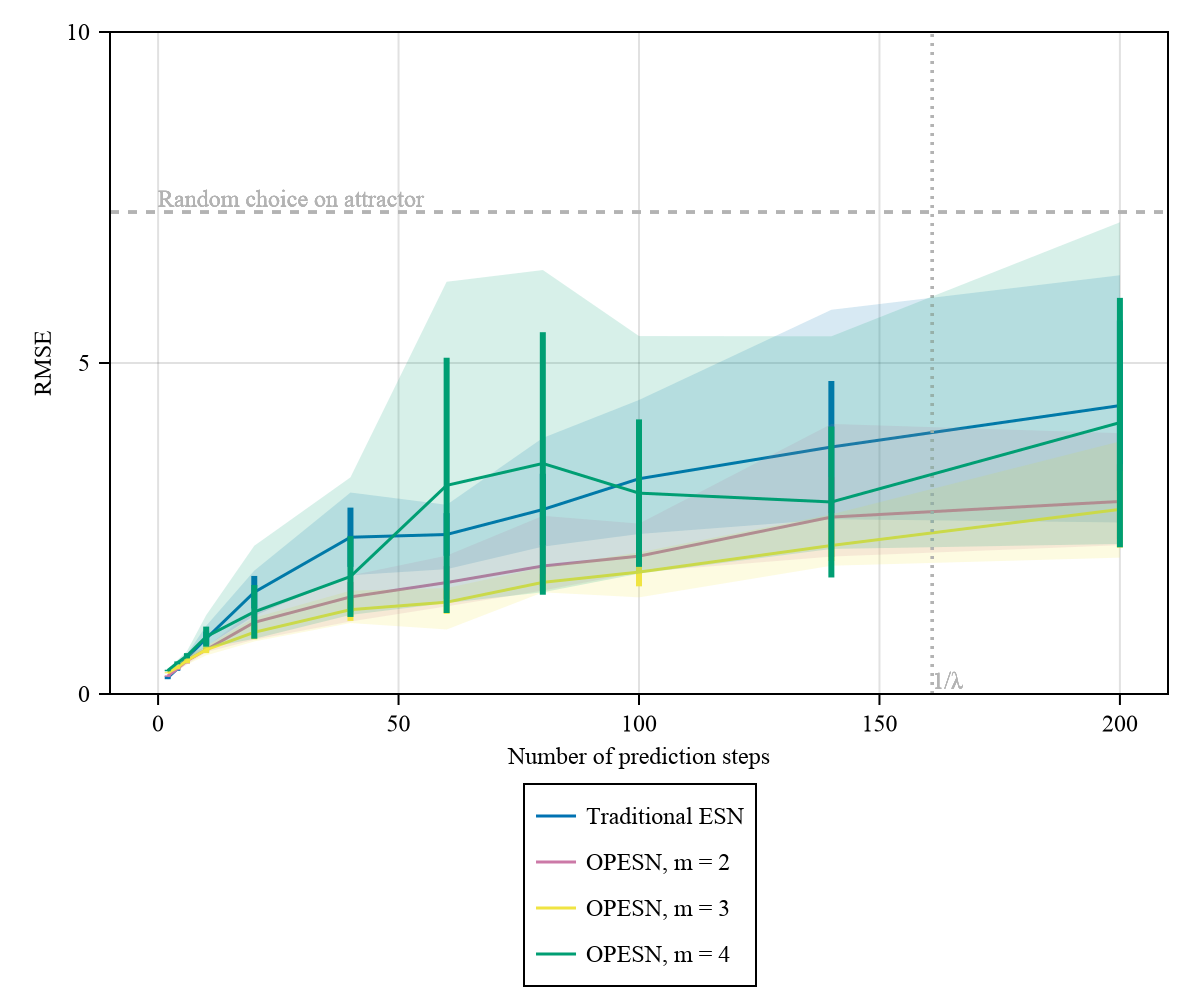

CairoMakie.Screen{IMAGE}


In [8]:
architecture = "OPESN"
prediction_type = "recursive"
attractor = "Rossler"

test_search = Dict(
    "prediction_type" => prediction_type == "recursive" ? "multi_step" : "single_step",
    "testing_params" => Dict(
        "dont_mask_input_vector" => false, # slightly better for lower time steps, no effect for most SS: slightly better all round
        "mask_states_b4_readout" => false, # much worse, worse than random choice on attractor. SS: no effect
        "stochastic" => false,
        "stochastic_rescale_V_rec" => false,
        "partition_choose_at_random" => false, # much worse, worse than vanilla SS: same
        "partition_take_turns" => false, # this doesn't work properly SS: worse, only as good as vanilla
        "readout_switching" => (architecture == "ORSESN"),#false,
        "layer_connections_one_to_one_constant_value" => false, # no effect (like none) SS: same
        "layer_connections_one_to_one_randomised" => false, # no significant effect, SS: slightly better, but not significant (~1σ)
        "layer_connections_fully_connected_trans_probs" => false, # slightly worse, ~3σ SS: worse, worse than Vanilla
        "layer_connections_fully_connected_constant_value" => false, # slightly worse, ~3σ
        "layer_connections_sparsely_connected" => false, # slightly worse, ~2σ
        "layer_connections_disconnected" => false, # no effect
        "add_self_loops" => false # no effect
    ),
    "data" => attractor == "Rossler" ? "Rossler 0_1" : "MG 0_5",# Extra Long",
    "testing_parameter" => "n_steps",
    "ignore_first" => 100,
    # "trials" => 30,
    "total_k" => 468,
    "noise_std" => 0.1,
    "τ" => 20
)


test_dict = Dict()

test_search["m"] = 1
test_search["τ"] = 1
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict["Traditional ESN"] = tests[end]

test_search["τ"] = 20

test_search["m"] = 2
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict[architecture * ", m = 2"] = tests[end]

test_search["m"] = 3
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict[architecture * ", m = 3"] = tests[end]

pop!(test_search, "total_k", nothing)

test_search["m"] = 4
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict[architecture * ", m = 4"] = tests[end-2]

fig = chart_tests(
    "",
    # "OPESN Recursive Prediction for Multiple Noise Levels, m = " * string(test_search["m"]),
    "Number of prediction steps",
    "RMSE",
    test_dict,
    error_funcs=["RMSE"],
    aggregation_funcs=["range", "mean", "std"],
    ylim_low=0,
    ylim_high=(attractor == "Rossler" ? 10 : 0.35),
    use_m_for_colour=false,
    put_first="Traditional ESN"
)

save(architecture * "_" * prediction_type * "_" * attractor * "_topline.pdf", fig)

display(fig)

# τ

1 tests found for m=2, τ=1
1 tests found for m=2, τ=2
1 tests found for m=2, τ=5
1 tests found for m=2, τ=10
1 tests found for m=2, τ=20
1 tests found for m=2, τ=50
1 tests found for m=2, τ=100
1 tests found for m=3, τ=1
1 tests found for m=3, τ=2
1 tests found for m=3, τ=5
1 tests found for m=3, τ=10
2 tests found for m=3, τ=20
1 tests found for m=3, τ=50
1 tests found for m=3, τ=100
1 tests found for m=4, τ=1
1 tests found for m=4, τ=2
1 tests found for m=4, τ=5
1 tests found for m=4, τ=10
2 tests found for m=4, τ=20
1 tests found for m=4, τ=50
1 tests found for m=4, τ=100


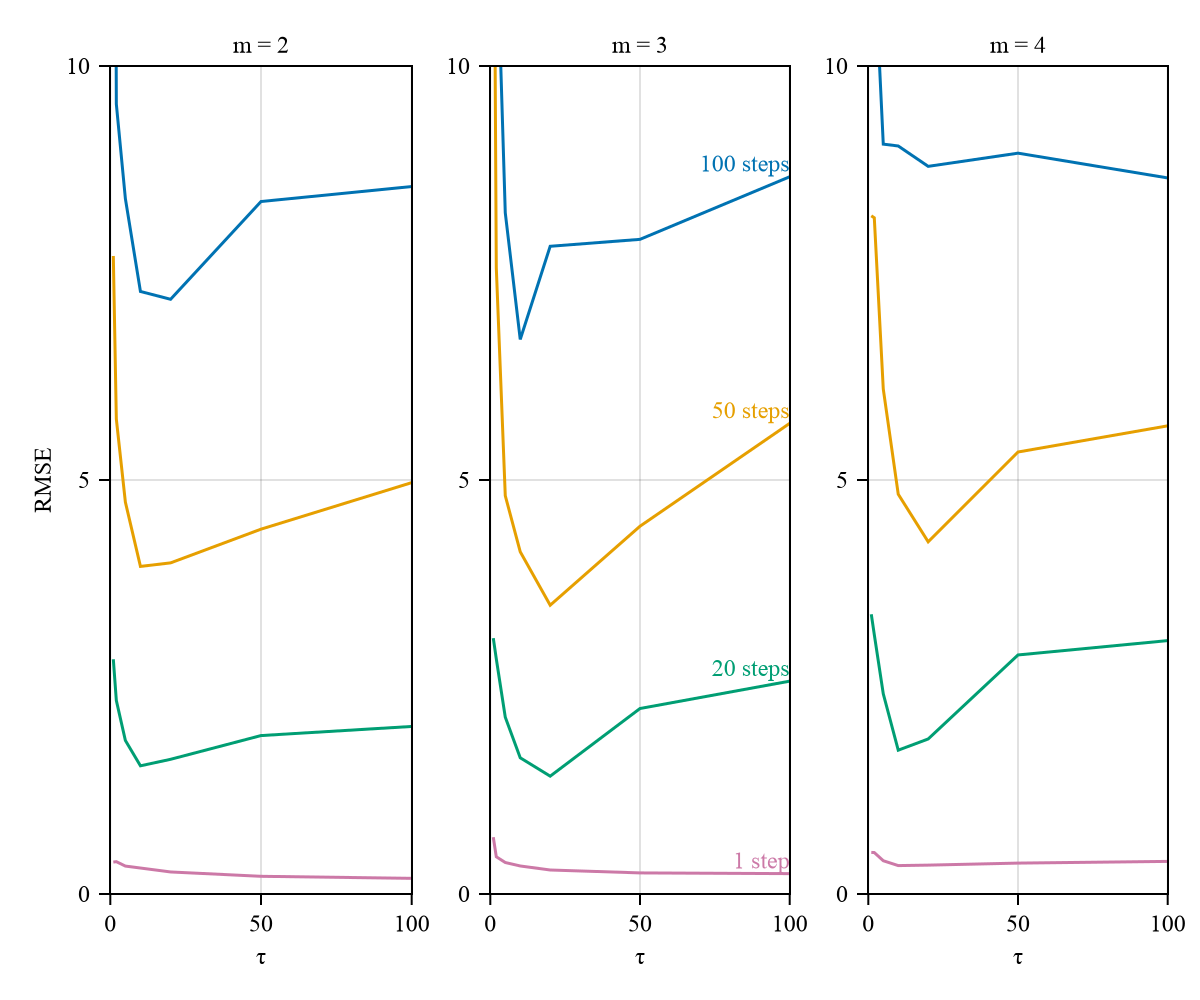

CairoMakie.Screen{IMAGE}


In [10]:
# Base search parameters without 'm' or 'noise_std'
test_search_base = Dict(
    "prediction_type"    => "multi_step",
    "testing_params"     => Dict(
        "dont_mask_input_vector"               => false,
        "mask_states_b4_readout"               => false,
        "stochastic"                           => false,
        "stochastic_rescale_V_rec"             => false,
        "partition_choose_at_random"           => false,
        "partition_take_turns"                 => false,
        "readout_switching"                    => false,
        "layer_connections_one_to_one_constant_value"  => false,
        "layer_connections_one_to_one_randomised"      => false,
        "layer_connections_fully_connected_trans_probs"=> false,
        "layer_connections_fully_connected_constant_value"=> false,
        "layer_connections_sparsely_connected" => false,
        "layer_connections_disconnected"       => false,
        "add_self_loops"                       => false
    ),
    "data"               => "Lorenz 0_01",
    "testing_parameter"  => "n_steps",
    "ignore_first"       => 100,
    # "trials"             => 30,
    "total_k"            => 468,
    "τ"                  => 20,
    "n_steps"            => [1,2,3,5,10,20,30,40,50,70,100],
    "noise_std"          => 0.1
)

palette = ["#0072B2", "#E69F00", "#009E73", "#CC79A7"]

# The noise levels we want to compare
τs = [1, 2, 5, 10, 20, 50, 100]

# Create a 2×2 GridLayout: two columns (m=2, m=3)
fig = Figure(size = (600, 500), dpi = 300)
gl  = fig[1, 1] = GridLayout(1, 2)

# Loop over m = 2 and m = 3
for (col, m) in enumerate(2:4)
    # build a fresh test_search dict for this m
    test_search = deepcopy(test_search_base)
    test_search["m"] = m

    if m == 4
        pop!(test_search, "total_k")
    end

    # collect the first test for each noise level
    test_dict = Dict{Float64, Any}()
    for τ in τs
        test_search["τ"] = τ
        tests = find_test(test_search)
        println(length(tests), " tests found for m=", m, ", τ=", τ)
        test_dict[τ] = tests[end]
    end

    # extract the RMSE means at selected steps
    steps_1   = [test_dict[τ]["measurements"]["RMSE"]["mean"][1]  for τ in τs]
    steps_20  = [test_dict[τ]["measurements"]["RMSE"]["mean"][6]  for τ in τs]
    steps_50  = [test_dict[τ]["measurements"]["RMSE"]["mean"][9]  for τ in τs]
    steps_100 = [test_dict[τ]["measurements"]["RMSE"]["mean"][11] for τ in τs]

    # plot into the grid and label lines directly
    
    ax = Axis(gl[1, col],
        xlabel = "τ",
        ylabel = col == 1 ? "RMSE" : "",
        title  = "m = " * string(m)
    )
    
    xlims!(ax, -0.1, maximum(τs) + 0.1)
    ylims!(ax, 0, 10)

    # draw each curve and place a text label at its endpoint
    lines!(ax, τs, steps_100, color = palette[1])
    lines!(ax, τs, steps_50, color = palette[2])
    lines!(ax, τs, steps_20, color = palette[3])
    lines!(ax, τs, steps_1, color = palette[4])

    if col == 2
        text!(ax, "100 steps",
            position      = (τs[end], steps_100[end]),
            color         =  palette[1],
            align = (:right, :bottom))
        text!(ax, "50 steps",
            position      = (τs[end], steps_50[end]),
            color         = palette[2],
            align = (:right, :bottom))
        text!(ax, "20 steps",
            position      = (τs[end], steps_20[end]),
            color         = palette[3],
            align = (:right, :bottom))
        text!(ax, "1 step",
            position      = (τs[end], steps_1[end]),
            color         = palette[4],
            align = (:right, :bottom))
    end
end

# save("OPESN_direct_tau_effect.pdf", fig)

display(fig)

# Longer Timestep

1 tests found
1 tests found
1 tests found
2 tests found


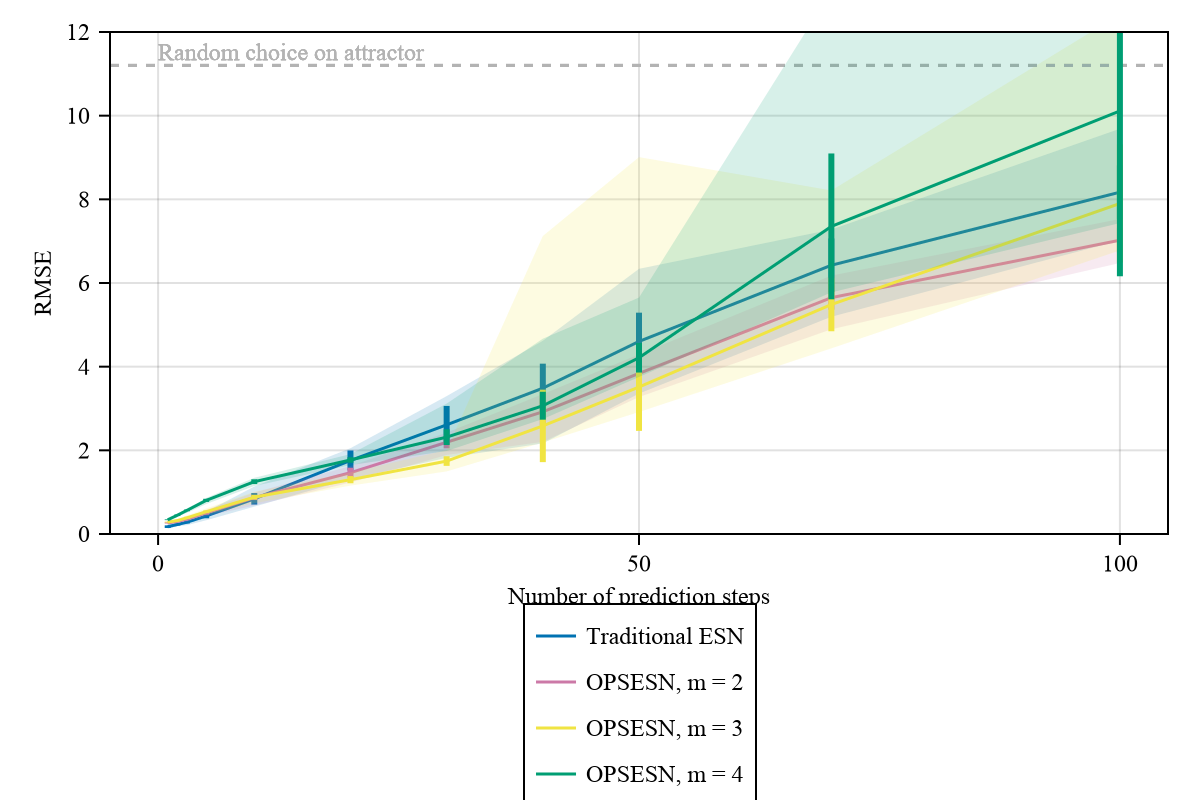

CairoMakie.Screen{IMAGE}


In [66]:
architecture = "OPSESN"
prediction_type = "recursive"
data = "Lorenz 0_01 Extra Long"

five_times_time_step = (data in ["Lorenz 0_05", "Rossler 0_5", "MG 2_5"])

τ = five_times_time_step ? 4 : 20

test_search = Dict(
    "prediction_type" => prediction_type == "recursive" ? "multi_step" : "single_step",
    "testing_params" => Dict(
        "dont_mask_input_vector" => false, # slightly better for lower time steps, no effect for most SS: slightly better all round
        "mask_states_b4_readout" => false, # much worse, worse than random choice on attractor. SS: no effect
        "stochastic" => false,
        "stochastic_rescale_V_rec" => false,
        "partition_choose_at_random" => false, # much worse, worse than vanilla SS: same
        "partition_take_turns" => false, # this doesn't work properly SS: worse, only as good as vanilla
        "readout_switching" => (architecture == "ORSESN"),#false,
        "layer_connections_one_to_one_constant_value" => false, # no effect (like none) SS: same
        "layer_connections_one_to_one_randomised" => false, # no significant effect, SS: slightly better, but not significant (~1σ)
        "layer_connections_fully_connected_trans_probs" => false, # slightly worse, ~3σ SS: worse, worse than Vanilla
        "layer_connections_fully_connected_constant_value" => false, # slightly worse, ~3σ
        "layer_connections_sparsely_connected" => false, # slightly worse, ~2σ
        "layer_connections_disconnected" => false, # no effect
        "add_self_loops" => false # no effect
    ),
    "data" => data,# Extra Long",
    "testing_parameter" => "n_steps",
    "ignore_first" => 100,
    # "trials" => 30,
    "total_k" => 468,
    "noise_std" => 0.1
)


test_dict = Dict()

test_search["m"] = 1
test_search["τ"] = 1
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict["Traditional ESN"] = tests[end]

test_search["τ"] = τ

test_search["m"] = 2
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict[architecture * ", m = 2"] = tests[end]

test_search["m"] = 3
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict[architecture * ", m = 3"] = tests[end]

pop!(test_search, "total_k", nothing)
test_search["m"] = 4
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict[architecture * ", m = 4"] = tests[end]

fig = chart_tests(
    "",
    # "OPESN Recursive Prediction for Multiple Noise Levels, m = " * string(test_search["m"]),
    "Number of prediction steps",
    "RMSE",
    test_dict,
    error_funcs=["RMSE"],
    aggregation_funcs=["range", "mean", "std"],
    ylim_low=0,
    ylim_high=12,
    xlim_low=-5,
    xlim_high=105,
    use_m_for_colour=false,
    put_first="Traditional ESN",
    include_legend=five_times_time_step,
    legend_proportion=five_times_time_step ? 0.2 : 0.0,
    height=five_times_time_step ? 500 : 400
)

save(architecture * "_topline_" * prediction_type * "_" * data * ".pdf", fig)

display(fig)

# More Data

In [12]:
architecture = "OPESN"
prediction_type = "recursive"

test_search = Dict(
    "prediction_type" => prediction_type == "recursive" ? "multi_step" : "single_step",
    "testing_params" => Dict(
        "dont_mask_input_vector" => false, # slightly better for lower time steps, no effect for most SS: slightly better all round
        "mask_states_b4_readout" => false, # much worse, worse than random choice on attractor. SS: no effect
        "stochastic" => false,
        "stochastic_rescale_V_rec" => false,
        "partition_choose_at_random" => false, # much worse, worse than vanilla SS: same
        "partition_take_turns" => false, # this doesn't work properly SS: worse, only as good as vanilla
        "readout_switching" => (architecture == "ORSESN"),#false,
        "layer_connections_one_to_one_constant_value" => false, # no effect (like none) SS: same
        "layer_connections_one_to_one_randomised" => false, # no significant effect, SS: slightly better, but not significant (~1σ)
        "layer_connections_fully_connected_trans_probs" => false, # slightly worse, ~3σ SS: worse, worse than Vanilla
        "layer_connections_fully_connected_constant_value" => false, # slightly worse, ~3σ
        "layer_connections_sparsely_connected" => false, # slightly worse, ~2σ
        "layer_connections_disconnected" => false, # no effect
        "add_self_loops" => false # no effect
    ),
    "data" => attractor == "Lorenz 0_01 Extra Long",
    "testing_parameter" => "n_steps",
    "ignore_first" => 100,
    # "trials" => 30,
    "total_k" => 468,
    "noise_std" => 0.1,
    "τ" => 20
)


test_dict = Dict()

test_search["m"] = 1
test_search["τ"] = 1
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict["Traditional ESN"] = tests[end]

test_search["τ"] = 20

test_search["m"] = 2
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict[architecture * ", m = 2"] = tests[end]

test_search["m"] = 3
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict[architecture * ", m = 3"] = tests[end]

pop!(test_search, "total_k", nothing)

test_search["m"] = 4
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict[architecture * ", m = 4"] = tests[end-2]

fig = chart_tests(
    "",
    # "OPESN Recursive Prediction for Multiple Noise Levels, m = " * string(test_search["m"]),
    "Number of prediction steps",
    "RMSE",
    test_dict,
    error_funcs=["RMSE"],
    aggregation_funcs=["range", "mean", "std"],
    ylim_low=0,
    ylim_high=(attractor == "Rossler" ? 10 : 0.35),
    use_m_for_colour=false,
    put_first="Traditional ESN"
)

# save(architecture * "_" * prediction_type * "_longer_timestep.pdf", fig)

display(fig)

ErrorException: No matching test found